In [1]:
import pandas as pd
import cv2 as cv
import sys 

import sklearn
import numpy as np 
import os
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.utils import io

In [2]:
sync = pd.read_csv('data/hands/Training/Shahar Terner/Sachar636771046527112972Sync.csv')
spot = pd.read_csv('data/hands/Training/Shahar Terner/Sachar636771045591258071Spontan.csv')
alone = pd.read_csv('data/hands/Training/Shahar Terner/Sachar636771047408504303Alone.csv')
alone_cmp = pd.read_csv('data/hands/HandRight.csv')


In [3]:
alone_cmp.head()

Time   Frame ID  Hand Type   # hands   Position X   Position Y  \
0  128.2883      15478      right         1     15.67167     226.2064   
1  128.3048      15480      right         1     16.24119     222.9389   
2  128.3218      15482      right         1     16.72461     220.9709   
3  128.3384      15484      right         1     17.09016     219.7124   
4  128.3551      15486      right         1     17.46017     219.3652   

    Position Z   Velocity X   Velocity Y   Velocity Z  ...       Yaw  \
0     20.26470     34.26665  -195.214700   -35.043020  ... -0.277800   
1     20.11781     36.16443  -180.093900    -4.052799  ... -0.277763   
2     19.94972     26.35298   -95.088190   -11.157620  ... -0.278792   
3     19.67679     19.46804   -61.755180   -21.303780  ... -0.279768   
4     19.13128     21.94964    -8.355943   -35.081790  ... -0.278629   

    Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X   Elbow Pos Y  \
0      46.88831      207.3548      86.23589      203.8337      49.33507   
1      47.54861      205.6568      86.42250      203.9553      47.88272   
2      48.15030      204.5182      86.35149      204.6231      45.35921   
3      48.64175      203.9989      86.16056      204.9939      44.18692   
4      48.93135      203.3777      85.59017      204.5952      42.68003   

    Elbow Pos Z   Grab Strenth   Grab Angle   Pinch Strength  
0      237.4553            0.0     0.206389              0.0  
1      238.4482            0.0     0.243050              0.0  
2      236.8544            0.0     0.281134              0.0  
3      236.0927            0.0     0.277691              0.0  
4      235.2896            0.0     0.283008              0.0  

[5 rows x 22 columns]

In [4]:
alone.head()

Time   Frame ID  Hand Type   # hands   Position X   Position Y  \
0  561.4594      67274       left         1    -70.33230     169.6624   
1  561.4760      67276       left         1    -69.29771     172.8164   
2  561.4925      67278       left         1    -67.98444     175.2615   
3  561.5090      67280       left         1    -66.06445     176.7525   
4  561.5256      67282       left         1    -63.64779     177.6863   

    Position Z   Velocity X   Velocity Y   Velocity Z  ...       Yaw  \
0     66.57047    116.82760    230.10440    -232.0020  ...  2.612679   
1     61.57287     43.34046    166.12220    -284.0924  ...  2.563127   
2     55.70394     75.70715    105.90160    -366.9593  ...  2.534463   
3     49.44841     99.28395     94.03284    -357.6847  ...  2.501072   
4     43.09280    147.84220     27.74666    -398.7127  ...  2.433856   

    Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X   Elbow Pos Y  \
0     -96.73210      121.8236      26.51512     -298.2882     -19.49716   
1     -95.64294      121.9743      24.74826     -287.7798     -32.12753   
2     -93.57269      121.8934      21.80350     -279.9629     -39.04336   
3     -90.90820      121.0040      18.81344     -273.9011     -43.63946   
4     -88.85471      119.9976      16.35428     -270.0061     -46.35603   

    Elbow Pos Z   Grab Strenth   Grab Angle   Pinch Strength  
0      35.98683       0.094123     1.888679         0.329454  
1      29.46060       0.000000     2.156652         0.462041  
2      28.45215       0.000000     2.059718         0.455725  
3      28.41852       0.000000     2.105497         0.550161  
4      30.38200       0.000000     2.095404         0.608649  

[5 rows x 22 columns]

In [5]:
alone_cmp['Time'] = alone_cmp['Time'] + (alone.iloc[0,0] - alone_cmp.iloc[0,0])
alone_cmp.head()

Time   Frame ID  Hand Type   # hands   Position X   Position Y  \
0  561.4594      15478      right         1     15.67167     226.2064   
1  561.4759      15480      right         1     16.24119     222.9389   
2  561.4929      15482      right         1     16.72461     220.9709   
3  561.5095      15484      right         1     17.09016     219.7124   
4  561.5262      15486      right         1     17.46017     219.3652   

    Position Z   Velocity X   Velocity Y   Velocity Z  ...       Yaw  \
0     20.26470     34.26665  -195.214700   -35.043020  ... -0.277800   
1     20.11781     36.16443  -180.093900    -4.052799  ... -0.277763   
2     19.94972     26.35298   -95.088190   -11.157620  ... -0.278792   
3     19.67679     19.46804   -61.755180   -21.303780  ... -0.279768   
4     19.13128     21.94964    -8.355943   -35.081790  ... -0.278629   

    Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X   Elbow Pos Y  \
0      46.88831      207.3548      86.23589      203.8337      49.33507   
1      47.54861      205.6568      86.42250      203.9553      47.88272   
2      48.15030      204.5182      86.35149      204.6231      45.35921   
3      48.64175      203.9989      86.16056      204.9939      44.18692   
4      48.93135      203.3777      85.59017      204.5952      42.68003   

    Elbow Pos Z   Grab Strenth   Grab Angle   Pinch Strength  
0      237.4553            0.0     0.206389              0.0  
1      238.4482            0.0     0.243050              0.0  
2      236.8544            0.0     0.281134              0.0  
3      236.0927            0.0     0.277691              0.0  
4      235.2896            0.0     0.283008              0.0  

[5 rows x 22 columns]

In [6]:
sync = sync.set_index('Time')
spot = spot.set_index('Time')
alone = alone.set_index('Time')
alone_cmp = alone_cmp.set_index('Time')

In [7]:
sync.describe()

Frame ID      # hands   Position X   Position Y   Position Z  \
count   9046.000000  9046.000000  9046.000000  9046.000000  9046.000000   
mean   61443.269954     1.999116    -8.303831   205.153307    29.692022   
std     2494.087862     0.029727   114.076689    39.633510    29.226010   
min    57122.000000     1.000000  -232.583500    95.871930   -86.975040   
25%    59284.500000     2.000000  -109.356550   179.866825    14.738917   
50%    61445.000000     2.000000   -12.148210   204.027550    32.707705   
75%    63602.750000     2.000000    97.852667   228.541900    47.597293   
max    65759.000000     2.000000   231.685000   345.954600   108.593800   

        Velocity X   Velocity Y   Velocity Z        Pitch         Roll  \
count  9046.000000  9046.000000  9046.000000  9046.000000  9046.000000   
mean     -0.258121    -0.687626     0.732390     1.302094     0.231522   
std     112.007500   105.639924    84.791598     0.406509     1.356114   
min    -522.291900  -936.715800  -604.876000     0.028502    -2.993421   
25%     -55.560432   -54.158552   -37.307492     1.098461    -1.101727   
50%      -2.167702     1.517804    -1.103987     1.355069    -0.290490   
75%      55.678945    57.430475    37.717388     1.595150     1.570480   
max     987.333000   695.924800   540.058200     2.321273     3.106793   

               Yaw   Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X  \
count  9046.000000   9046.000000   9046.000000   9046.000000   9046.000000   
mean     -0.411449      5.073159    148.374353     36.942437     26.289437   
std       1.393457    137.431949     40.076469     22.010824    285.808342   
min      -3.140609   -235.378900     41.043330    -38.334400   -400.466000   
25%      -1.292490   -122.879800    123.924300     24.876653   -253.124300   
50%      -0.743953     18.912010    147.196300     37.902940    193.307900   
75%       0.378623    139.920700    172.974625     48.259473    311.208225   
max       3.141453    274.867000    282.715400    146.509600    422.735900   

        Elbow Pos Y   Elbow Pos Z   Grab Strenth   Grab Angle   Pinch Strength  
count   9046.000000   9046.000000    9046.000000  9046.000000      9046.000000  
mean     -35.685580     66.189130       0.071603     0.460350         0.057312  
std       58.315204     44.493832       0.220393     0.791437         0.188010  
min     -186.772400    -59.390530       0.000000     0.000000         0.000000  
25%      -78.672092     35.056368       0.000000     0.000000         0.000000  
50%      -31.166265     68.548995       0.000000     0.044963         0.000000  
75%        4.347710     93.500363       0.000000     0.512012         0.000000  
max      163.435600    210.481400       1.000000     3.141593         1.000000

In [8]:
sync.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9046 entries, 473.3199 to 548.3006
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0    Frame ID        9046 non-null   int64  
 1    Hand Type       9046 non-null   object 
 2    # hands         9046 non-null   int64  
 3    Position X      9046 non-null   float64
 4    Position Y      9046 non-null   float64
 5    Position Z      9046 non-null   float64
 6    Velocity X      9046 non-null   float64
 7    Velocity Y      9046 non-null   float64
 8    Velocity Z      9046 non-null   float64
 9    Pitch           9046 non-null   float64
 10   Roll            9046 non-null   float64
 11   Yaw             9046 non-null   float64
 12   Wrist Pos X     9046 non-null   float64
 13   Wrist Pos Y     9046 non-null   float64
 14   Wrist Pos Z     9046 non-null   float64
 15   Elbow pos X     9046 non-null   float64
 16   Elbow Pos Y     9046 non-null   float64
 17   

In [9]:
sync.head()

Frame ID  Hand Type   # hands   Position X   Position Y  \
Time                                                                 
473.3199      57122      right         2     122.5620     218.3500   
473.3199      57122       left         2    -127.4118     201.7256   
473.3364      57124      right         2     122.6436     220.4657   
473.3364      57124       left         2    -127.6337     203.2215   
473.3530      57126      right         2     122.5734     222.8511   

           Position Z   Velocity X   Velocity Y   Velocity Z     Pitch  ...  \
Time                                                                    ...   
473.3199    -31.88206    19.886130     75.80657     65.97881  0.617926  ...   
473.3199    -10.88737   -16.198040    108.11870     41.10345  0.484390  ...   
473.3364    -30.86330    -0.449261    121.86500     63.31036  0.672810  ...   
473.3364     -9.95556   -19.241040     90.65759     51.81181  0.508929  ...   
473.3530    -29.92606    -7.838688    126.03910     51.80624  0.722643  ...   

               Yaw   Wrist Pos X   Wrist Pos Y   Wrist Pos Z   Elbow pos X  \
Time                                                                         
473.3199 -0.440404      154.1254      174.5538      12.09824      310.6552   
473.3199  0.241881     -143.8172      160.5733      41.88228     -301.3908   
473.3364 -0.435520      153.1742      174.1515      11.24345      305.8892   
473.3364  0.224138     -142.9792      160.6243      42.04107     -296.4537   
473.3530 -0.436253      152.2634      174.3460      10.30312      298.7614   

           Elbow Pos Y   Elbow Pos Z   Grab Strenth   Grab Angle  \
Time                                                               
473.3199      8.973523     106.50380            0.0     0.145420   
473.3199     -6.086051     132.57990            0.0     0.156763   
473.3364      3.519703     102.86100            0.0     0.119546   
473.3364     -9.288877     133.72500            0.0     0.181778   
473.3530     -2.771122      99.73855            0.0     0.112040   

           Pinch Strength  
Time                       
473.3199              0.0  
473.3199              0.0  
473.3364              0.0  
473.3364              0.0  
473.3530              0.0  

[5 rows x 21 columns]

In [10]:
left_s = sync[sync[' Hand Type'] == 'left']
right_s = sync[sync[' Hand Type'] == 'right']

left_sp = spot[spot[' Hand Type'] == 'left']
right_sp = spot[spot[' Hand Type'] == 'right']

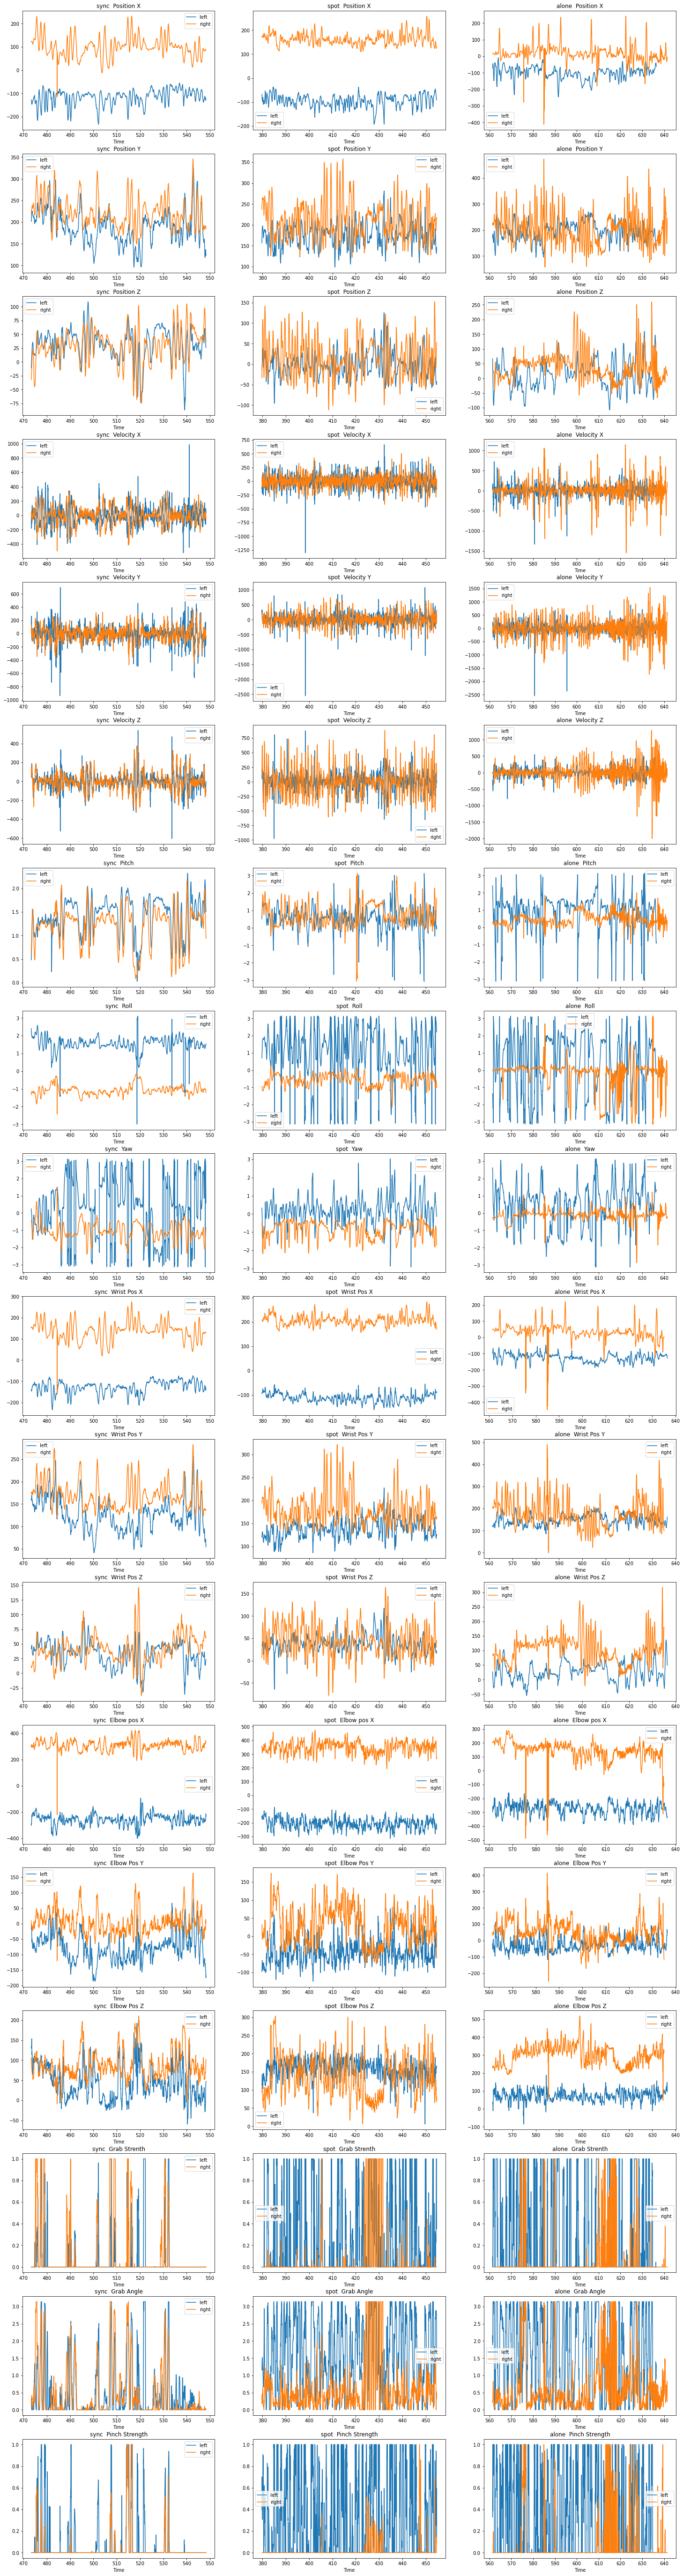

In [122]:
plt.figure()
i = 1
for x in range(1,54 ,3):
    plt.subplot(18,3,x)
    left_s.iloc[:,i+2].plot(figsize=(25,100),label='left')
    right_s.iloc[:,i+2].plot(figsize=(25,100),label='right')
    plt.title("sync {}".format(left_s.columns[i+2]))
    plt.legend()

    plt.subplot(18,3,x + 1)
    left_sp.iloc[:,i+2].plot(figsize=(25,100),label='left')
    right_sp.iloc[:,i+2].plot(figsize=(25,100),label='right')
    plt.title("spot {}".format(left_s.columns[i+2]))
    plt.legend()
    
    plt.subplot(18,3,x + 2)
    alone.iloc[:,i+2].plot(figsize=(25,100),label='left')
    alone_cmp.iloc[:,i+2].plot(figsize=(25,100),label='right')
    plt.title("alone {}".format(left_s.columns[i+2]))
    plt.legend()

    i = i + 1
plt.show()



## Loading the data

In [21]:
right_hand = pd.read_csv('data/hands/HandRight.csv') 

right_hand[" Hand Type"] = "right"
right_hand = right_hand.dropna()

def join_right_hand(df):

    right_hand['Time'] = df['Time']
    right_hand[' Frame ID'] = df[[' Frame ID']]

    frames = [df,right_hand]
    df = pd.concat(frames)

    df = df.sort_values(' Hand Type').sort_values('Time',kind='stable')
    x = df[' Hand Type'].value_counts()
    df = df.reset_index().iloc[:x.iloc[1] * 2]
    
    df[" # hands"] = 2

    return df

In [85]:
def proccess_df(df):
    df = df.drop(df[df[" # hands"] == 1].index)

    left = df[df[' Hand Type'] == 'left'].reset_index()
    right = df[df[' Hand Type'] == 'right'].reset_index()

    ret = pd.DataFrame({
        'diff_pos_x': [(left[' Position X'] - right[' Position X']).mean()],
        'diff_pos_y': [(left[' Position Y'] - right[' Position Y']).mean()],
        'diff_pos_z': [(left[' Position Z'] - right[' Position Z']).mean()],
        'diff_vel_x': [(left[' Velocity X'] - right[' Velocity X']).mean()],
        'diff_vel_y': [(left[' Velocity Y'] - right[' Velocity Y']).mean()],
        'diff_vel_z': [(left[' Velocity Z'] - right[' Velocity Z']).mean()],
        'diff_wr_pos_x': [(left[' Wrist Pos X'] - right[' Wrist Pos X']).mean()],
        'diff_wr_pos_y': [(left[' Wrist Pos Y'] - right[' Wrist Pos Y']).mean()],
        'diff_wr_pos_z': [(left[' Wrist Pos Z'] - right[' Wrist Pos Z']).mean()],
    })
    
    return ret

In [91]:
def load_data(path):
    li = []

    for subject in os.listdir(path):
        for file in os.listdir(path + '/' + subject):
            df = pd.read_csv(path + '/' + subject + '/' + file)
            if "Alone" in file:
                df = join_right_hand(df)
                df = proccess_df(df)
                df['OUTCOME'] = 0
            elif "Sync" in file:
                df = proccess_df(df)
                df['OUTCOME'] = 1
            else:
                df = proccess_df(df)
                df['OUTCOME'] = 2
            li.append(df)
    df = pd.concat(li).reset_index()
    return df

In [96]:
df = load_data('data/hands/Training')
df_test = load_data('data/hands/Validation')

data/hands/Training/Shahar Terner/Sachar636771045591258071Spontan.csv
data/hands/Training/Shahar Terner/Sachar636771047408504303Alone.csv
data/hands/Training/Shahar Terner/Sachar636771046527112972Sync.csv
data/hands/Training/Orya Kalmanovitz/OryaB636771082736601528Alone.csv
data/hands/Training/Orya Kalmanovitz/OryaB636771083605535985Spontan.csv
data/hands/Training/Orya Kalmanovitz/OryaB636771084494502229Sync.csv
data/hands/Training/Evyatar Cohen/Evyatar636771053639929594Sync.csv
data/hands/Training/Evyatar Cohen/Evyatar636771054555711409Alone.csv
data/hands/Training/Evyatar Cohen/Evyatar636771052727603804Spontan.csv
data/hands/Training/Shelly Social_Nuero/Shelly636759787508979097Spontan.csv
data/hands/Training/Shelly Social_Nuero/Shelly636759789526313406Sync.csv
data/hands/Training/Shelly Social_Nuero/Shelly636759788383205274Alone.csv
data/hands/Training/Yael Hagai/Yael636771060699529085Sync.csv
data/hands/Training/Yael Hagai/Yael636771061659067649Alone.csv
data/hands/Training/Yael Hag

In [93]:
df.head()

index  diff_pos_x  diff_pos_y  diff_pos_z  diff_vel_x  diff_vel_y  \
0      0 -257.824008  -35.529432  -16.660875    0.927652    0.415813   
1      0 -118.882232  -12.197856  -26.034198   -5.573825   12.174090   
2      0 -215.321812  -33.944281    3.338466    0.215732   -0.465039   
3      0  -50.739706  -39.207449   -6.929705   -5.905795   11.241061   
4      0 -247.177884  -63.802655   39.335688   -0.919878    3.222040   

   diff_vel_z  diff_wr_pos_x  diff_wr_pos_y  diff_wr_pos_z  OUTCOME  
0   -1.305692    -318.109551     -42.580904      -6.630292        2  
1   -0.618538    -158.575420     -29.243938     -75.212620        0  
2   -0.491870    -264.786948     -44.474630      -8.223133        1  
3    0.451445    -129.726169     -25.933706     -65.929669        0  
4   -0.015222    -345.183210     -42.709621      17.550063        2

In [94]:
df["OUTCOME"].value_counts()

0    9
1    9
2    9
Name: OUTCOME, dtype: int64

In [97]:
x_train = df.drop('OUTCOME',axis=1)
y_train = df['OUTCOME']
x_test = df_test.drop('OUTCOME',axis=1)
y_test = df_test['OUTCOME']


In [130]:
df_test.head()

Time   Frame ID   Hand Type   # hands   Position X   Position Y  \
0  772.2799    90321.0           0         2     65.37845     224.3082   
1  772.2799    90321.0           1         2   -218.35700     305.6544   
2  772.2964    90323.0           0         2     63.55072     220.1848   
3  772.2964    90323.0           1         2   -213.44920     312.6948   
4  772.3131    90325.0           0         2     61.66813     217.5243   

    Position Z   Velocity X   Velocity Y   Velocity Z  ...   Wrist Pos X  \
0    112.75900   -112.50850   -293.12840    318.10640  ...      129.0877   
1     63.57877    193.24920    313.48280    -16.51894  ...     -276.7855   
2    117.93530    -57.90208    -37.84834    377.73690  ...      127.3381   
3     62.97603    378.39140    334.78480    -62.01735  ...     -273.1128   
4    122.59860    -90.69568    -84.79558    298.46620  ...      125.6021   

    Wrist Pos Y   Wrist Pos Z   Elbow pos X   Elbow Pos Y   Elbow Pos Z  \
0      196.6624     107.62950      351.3936      90.84698      131.1359   
1      279.1037      91.25497     -481.7012     163.33340      167.2560   
2      193.0091     111.56650      354.6543      98.62046      135.8045   
3      287.6982      89.44084     -475.7014     169.70460      168.2110   
4      190.9333     115.36450      356.3591     105.17530      139.1584   

    Grab Strenth   Grab Angle   Pinch Strength  OUTCOME  
0            0.0     0.453898         0.000000        2  
1            0.0     0.550612         0.460952        2  
2            0.0     0.495044         0.000000        2  
3            0.0     0.540570         0.128885        2  
4            0.0     0.518979         0.000000        2  

[5 rows x 23 columns]

In [98]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)

[21:37:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7777777777777778

In [99]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
ada.score(x_test,y_test)

0.8888888888888888

In [100]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)


0.7777777777777778

In [46]:
ret = pd.DataFrame({
    'diff_pos_x': [],
    'diff_pos_y': [],
    'diff_pos_z': [],
    'diff_vel_x': [],
    'diff_vel_y': [],
    'diff_vel_z': [],
    'diff_pos_z': [],
    'diff_wr_pos_x': [],
    'diff_wr_pos_y': [],
    'diff_wr_pos_z': [],
})

ret['diff_pos_x'] = (left_s[' Position X'] - right_s[' Position X'])
ret['diff_pos_y'] = (left_s[' Position Y'] - right_s[' Position Y'])
ret['diff_pos_z'] = (left_s[' Position Z'] - right_s[' Position Z'])

ret['diff_vel_x'] = (left_s[' Velocity X'] - right_s[' Velocity X'])
ret['diff_vel_y'] = (left_s[' Velocity Y'] - right_s[' Velocity Y'])
ret['diff_vel_z'] = (left_s[' Velocity Z'] - right_s[' Velocity Z'])

ret['diff_wr_pos_x'] = (left_s[' Wrist Pos X'] - right_s[' Wrist Pos X'])
ret['diff_wr_pos_y'] = (left_s[' Wrist Pos Y'] - right_s[' Wrist Pos Y'])
ret['diff_wr_pos_z'] = (left_s[' Wrist Pos Z'] - right_s[' Wrist Pos Z'])

In [58]:
(left_s[' Position X'] - right_s[' Position X'])

Time
473.3199   -249.97380
473.3364   -250.27730
473.3530   -250.36060
473.3697   -251.50980
473.3861   -252.59040
              ...    
548.2347   -212.58079
548.2511   -211.92360
548.2675   -210.41894
548.2841   -209.21872
548.3006   -207.65495
Name:  Position X, Length: 4527, dtype: float64